# Import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import dataset

In [2]:
df = pd.read_csv('city_temperature.csv')

C:\Users\phili\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Info on dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906327 entries, 0 to 2906326
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          object 
 1   Country         object 
 2   State           object 
 3   City            object 
 4   Month           int64  
 5   Day             int64  
 6   Year            int64  
 7   AvgTemperature  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 177.4+ MB


In [21]:
df.describe()

,Month,Day,Year,AvgTemperature
count,2.906327e+06,2.906327e+06,2.906327e+06,2.906327e+06
mean,6.469163e+00,1.571682e+01,2.006624e+03,5.600492e+01
std,3.456489e+00,8.800534e+00,2.338226e+01,3.212359e+01
min,1.000000e+00,0.000000e+00,2.000000e+02,-9.900000e+01
25%,3.000000e+00,8.000000e+00,2.001000e+03,4.580000e+01
50%,6.000000e+00,1.600000e+01,2.007000e+03,6.250000e+01
75%,9.000000e+00,2.300000e+01,2.013000e+03,7.550000e+01
max,1.200000e+01,3.100000e+01,2.020000e+03,1.100000e+02


# Distribution of average temps. across the globe

C:\Users\phili\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AvgTemperature', ylabel='Density'>

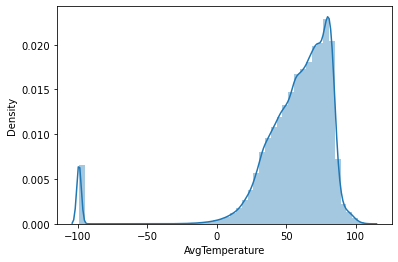

In [13]:
sns.distplot(df['AvgTemperature'])

# negative avg. temps. seems to be a typo

In [307]:
df['AvgTemperature'].reset_index().sort_values(by = 'AvgTemperature', ascending = True).head(100)

,index,AvgTemperature
1377340,1377340,-99.0
88779,88779,-99.0
88778,88778,-99.0
88777,88777,-99.0
88776,88776,-99.0
...,...,...
88737,88737,-99.0
88736,88736,-99.0
88735,88735,-99.0
88734,88734,-99.0


# some mislabeled year data in our dataset - both in years and temperatures

In [295]:
df['Year'].value_counts()

2000    119682
1999    119355
2001    119355
2002    119355
2003    119140
1998    119082
1996    118951
1997    118656
2004    118645
1995    118616
2005    117895
2006    117647
2010    115627
2007    115428
2008    114908
2009    114247
2011    113740
2012    111993
2013    111021
2014    109018
2015    107498
2016    107237
2017    106946
2018    106698
2019    106337
2020     38810
201        351
200         89
Name: Year, dtype: int64

# Africa and Central/South America do not have the range of average temps as North America and Asia

<AxesSubplot:xlabel='Region', ylabel='AvgTemperature'>

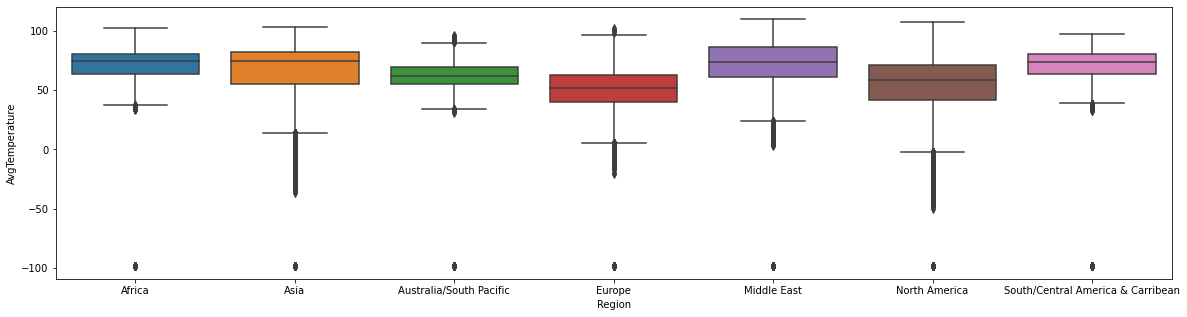

In [19]:
plt.figure(figsize=(20, 5))
sns.boxplot(x = 'Region', y = 'AvgTemperature', data = df)

# Middle East has highest annual avg. temp. on Earth. Asia follows...

In [115]:
df.groupby('Region')['AvgTemperature'].mean().reset_index().sort_values(by = 'AvgTemperature', ascending = False)

,Region,AvgTemperature
4,Middle East,68.384554
1,Asia,62.568652
6,South/Central America & Carribean,62.189439
2,Australia/South Pacific,61.180869
5,North America,55.300933
0,Africa,53.549517
3,Europe,46.696285


In [282]:
 top_20_hot_cities_list = df.groupby(['City'])['AvgTemperature'].max().reset_index()\
    .sort_values(by = 'AvgTemperature', ascending = False).head(20)['City'].values

In [321]:
top_20_hot_cities = df[(df['City'] == top_20_hot_cities_list[0]) | (df['City'] == top_20_hot_cities_list[1]) |\
                       (df['City'] == top_20_hot_cities_list[2]) | (df['City'] == top_20_hot_cities_list[3]) |\
                     (df['City'] == top_20_hot_cities_list[5]) |
                       (df['City'] == top_20_hot_cities_list[6]) | (df['City'] == top_20_hot_cities_list[7]) |
                       (df['City'] == top_20_hot_cities_list[9]) |(df['City'] == top_20_hot_cities_list[10]) | (df['City'] == top_20_hot_cities_list[11]) |\
                       (df['City'] == top_20_hot_cities_list[12]) | (df['City'] == top_20_hot_cities_list[13]) |\
                       (df['City'] == top_20_hot_cities_list[14]) |
                       (df['City'] == top_20_hot_cities_list[17]) | (df['City'] == top_20_hot_cities_list[18]) |\
                       (df['City'] == top_20_hot_cities_list[19])]

# focusing on the top 20 hottest cities, there is a trend toward higher average 
# annual temperature in the 25-year data window.


<AxesSubplot:xlabel='Year', ylabel='AvgTemperature'>

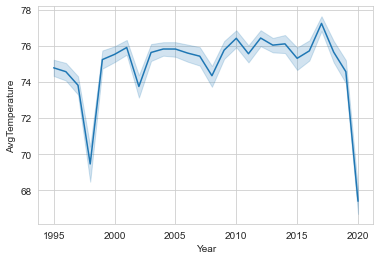

In [324]:
sns.set_style('whitegrid')
sns.lineplot(x = 'Year', y = 'AvgTemperature', data = top_20_hot_cities)

# Significant decrease in the annual average temperature in these cities in the year 2020 is due to that lack of data in this year.

# Annual average temp for 16 of the world's hottest cities does appear to be increasing slightly - even in this small time window!

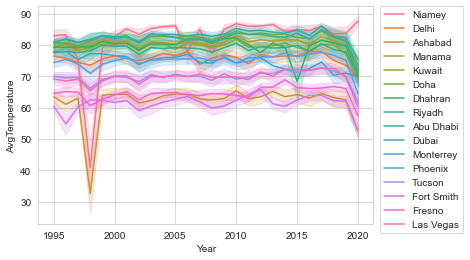

In [323]:
sns.set_style('whitegrid')
sns.lineplot(x = 'Year', y = 'AvgTemperature', data = top_20_hot_cities, hue = 'City')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [315]:
top_20_cities_list

array(['Kuwait', 'Doha', 'Dhahran', 'Phoenix', 'Yuma', 'Dubai',
       'Abu Dhabi', 'Las Vegas', 'Muscat', 'Riyadh', 'Delhi', 'Monterrey',
       'Manama', 'Niamey', 'Fresno', 'Nicosia', 'Islamabad', 'Ashabad',
       'Tucson', 'Fort Smith'], dtype=object)

In [267]:
df.groupby(['City', 'Year'])['AvgTemperature'].max().reset_index().sort_values(by = 'AvgTemperature', ascending = False)

,City,Year,AvgTemperature
3948,Kuwait,2012,110.0
3951,Kuwait,2015,109.9
3953,Kuwait,2017,109.9
3941,Kuwait,2005,109.9
3946,Kuwait,2010,109.7
...,...,...,...
1491,Bujumbura,2001,-99.0
1492,Bujumbura,2002,-99.0
7281,Tirana,1995,-99.0
7282,Tirana,1996,-99.0


# Let's now focus on the US data

In [204]:
us_data = df[df['Country'] == 'US']

# average air temp most directly correlated with the Month as expected

In [205]:
us_data.corr()

,Month,Day,Year,AvgTemperature
Month,1.000000,0.011076,-0.027362,0.166319
Day,0.011076,1.000000,-0.002771,0.005027
Year,-0.027362,-0.002771,1.000000,0.024798
AvgTemperature,0.166319,0.005027,0.024798,1.000000


# Avg. Temp by year in US.

# Slight positive trend is visible 

# Did the US really experience an almost 10 degree drop in annual average temp between 2019 and 2020?

<AxesSubplot:xlabel='Year', ylabel='AvgTemperature'>

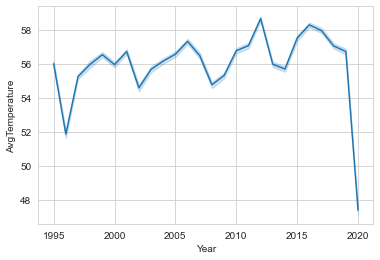

In [325]:
sns.set_style('whitegrid')
sns.lineplot(x = 'Year', y = 'AvgTemperature', data = us_data)

# The number of data points for the year 2020 is less than half the number for any year before it. We suspect these data we're collected in the first half of the year leading to a drop in the annual average temp (absent the summer months). Let's be sure...

In [221]:
us_data['Year'].value_counts()

1996    58560
2000    58560
2004    58481
1995    58400
1997    58400
1998    58400
1999    58400
2001    58400
2002    58400
2003    58400
2005    58035
2006    58032
2008    57828
2007    57670
2009    57670
2010    57345
2012    56364
2011    56210
2013    56057
2016    55998
2015    55846
2019    55845
2014    55845
2017    55845
2018    55845
2020    20501
Name: Year, dtype: int64

# As suspected, the us data for the year 2020 ends in May and is not complete for that month. This explains that drastic drop in average annual temp in US and the < 50% reported data for the year.

In [222]:
us_data[us_data['Year'] == 2020]['Month'].value_counts()

3    4743
1    4743
4    4590
2    4437
5    1988
Name: Month, dtype: int64

# Avg Temp. by month 

# more variability in monthly average temps as northern cities become cold and southern cities stay warm in winter.

# we directly experience this warming (or cooling) through the months

<AxesSubplot:xlabel='Month', ylabel='AvgTemperature'>

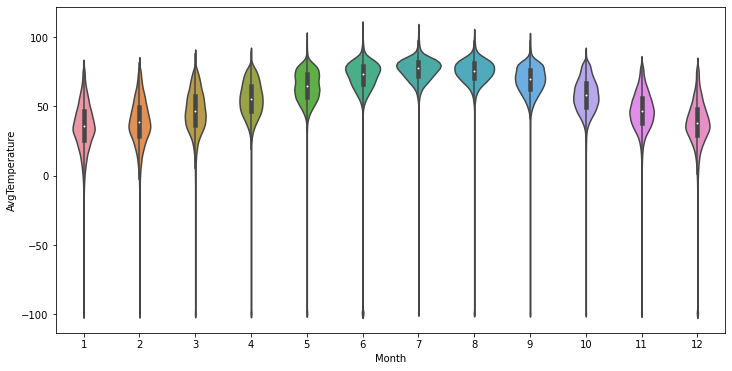

In [207]:
plt.figure(figsize=(12,6))
sns.violinplot(x = 'Month', y = 'AvgTemperature', data = us_data)

# Average temp by year

# no clear trend in avg temps over our 25 year period. This agress with the low (but still positive) correlation between year and avg. temp.

# This small correlation is difficult to percieve experientially.

<AxesSubplot:xlabel='Year', ylabel='AvgTemperature'>

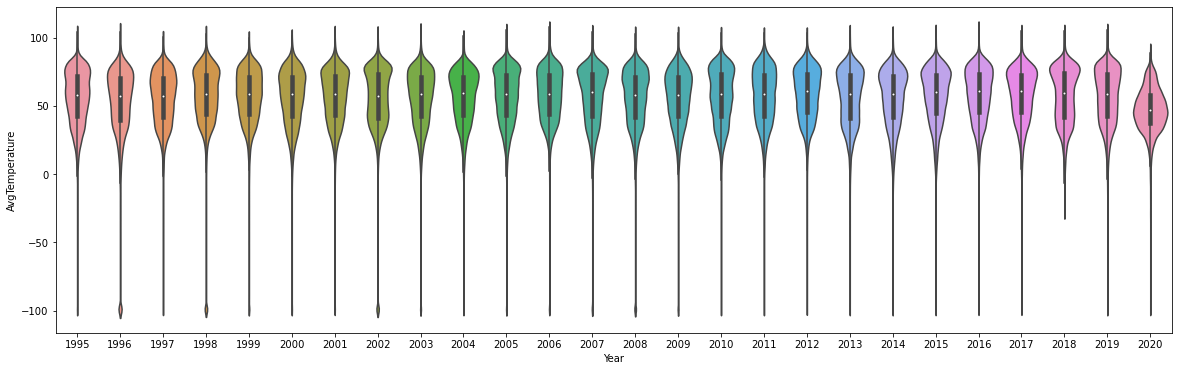

In [223]:
plt.figure(figsize=(20,6))
sns.violinplot(x = 'Year', y = 'AvgTemperature', data = us_data)

# Avg. Annual Temp by state

# Hawaii has the warmest annual average temperature... Alaska the coolest.

In [211]:
us_data.groupby('State')['AvgTemperature'].mean().reset_index().sort_values(by = 'AvgTemperature', ascending = False)

,State,AvgTemperature
12,Hawaii,77.034593
10,Florida,71.562343
19,Louisiana,67.648516
3,Arizona,67.589949
44,Texas,66.211637
41,South Carolina,64.753243
11,Georgia,64.268373
1,Alabama,64.106020
25,Mississippi,63.347539
4,Arkansas,62.025192


# Maximum daily avg. temp by state

# Arizona has the highest daily average temperature, Alaska the lowest daily high in our 25 year period. 

# Hawaii is in the bottom three lowest high daily average temps despite having the greatest annual average temp! This implies Hawaii has a very consistent climate. 

In [212]:
us_data.groupby('State')['AvgTemperature'].max().reset_index().sort_values(by = 'AvgTemperature', ascending = False)

,State,AvgTemperature
3,Arizona,107.7
29,Nevada,107.0
5,California,102.6
4,Arkansas,100.7
37,Oklahoma,100.4
27,Montana,100.1
44,Texas,98.5
11,Georgia,97.7
48,Washington,97.7
38,Oregon,97.3


In [253]:
hottest_states_list = us_data.groupby(['State'])['AvgTemperature'].max().reset_index().sort_values\
(by = 'AvgTemperature', ascending = False).head(10)['State'].values

In [257]:
hottest_states = us_data[(us_data['State'] == hottest_states_list[0]) | (us_data['State'] == hottest_states_list[1]) |\
                         (us_data['State'] == hottest_states_list[2]) | (us_data['State'] == hottest_states_list[3]) |\
                        (us_data['State'] == hottest_states_list[4]) | (us_data['State'] == hottest_states_list[5]) |\
                         (us_data['State'] == hottest_states_list[6]) | (us_data['State'] == hottest_states_list[7]) |\
                         (us_data['State'] == hottest_states_list[8]) | (us_data['State'] == hottest_states_list[9])]

# Average temp by year for the ten states with the highest daily average temp.

# aside from Arizona, no large increase in annual Avg. Temp. over our twenty five year period.

# what about looking at highest daily temp per year in each of these states?

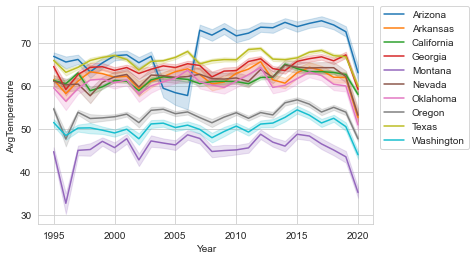

In [326]:
sns.set_style('whitegrid')
sns.lineplot(x = 'Year', y = 'AvgTemperature', data = hottest_states, hue = 'State')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [260]:
us_data.groupby(['State', 'Year'])['AvgTemperature'].max().reset_index().sort_values(by = 'AvgTemperature', ascending = False).head(20)
# maximum temperature per year by state. Does the daily average temp by year in a given state show a trend?

,State,Year,AvgTemperature
92,Arizona,2016,107.7
82,Arizona,2006,107.5
758,Nevada,2016,107.0
79,Arizona,2003,105.8
95,Arizona,2019,105.7
747,Nevada,2005,105.5
93,Arizona,2017,105.2
91,Arizona,2015,105.1
94,Arizona,2018,105.0
755,Nevada,2013,104.9


In [261]:
hottest_days = hottest_states.groupby(['State', 'Year'])['AvgTemperature'].max().reset_index()

# hottest days through the 25-year period for the top ten hottest states

# possibly slight upward trend exists. expanding this dataset to 1895 would surley be more illuminating.

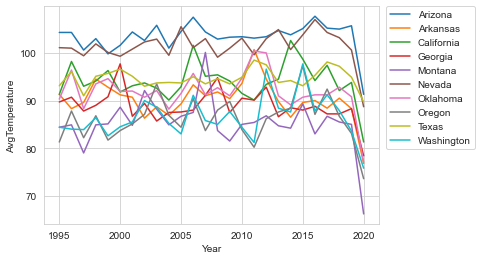

In [327]:
sns.set_style('whitegrid')
sns.lineplot(x ='Year', y = 'AvgTemperature', data = hottest_days, hue = 'State')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# average temperature by month for top ten hottest states

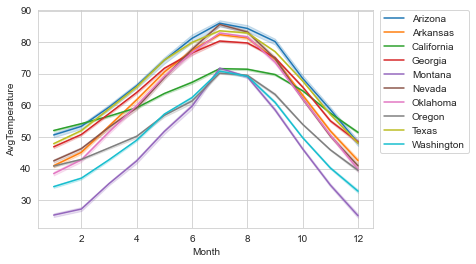

In [328]:
sns.set_style('whitegrid')
sns.lineplot(x = 'Month', y = 'AvgTemperature', data = hottest_states, hue = 'State', )
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)